<a href="https://colab.research.google.com/github/Nathal97/ML/blob/main/CaliforniaHousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informations sur l'étudiant:
Nom : RAZAFIMANANTSOA

Prénom(s) : Nathalie Malalasoa Kantoniaina

Classe : ISAIA 4

Numéro : 06


# **1. Chargement et inspection des données**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Configuration graphique
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


In [ ]:
# Charger le jeu de données California Housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame
print(f"Dimensions du dataset : {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\nVariable cible : MedHouseVal (valeur médiane du logement en centaines de milliers de $)")
print(f"\nDescription des variables :")
print("-" * 60)
descriptions = {
'MedInc': 'Revenu médian du quartier',
'HouseAge': 'Âge médian des logements',
'AveRooms': 'Nombre moyen de pièces par logement',
'AveBedrms': 'Nombre moyen de chambres par logement',
'Population': 'Population du quartier',
'AveOccup': 'Nombre moyen d\'occupants par logement',
'Latitude': 'Latitude géographique',
'Longitude': 'Longitude géographique',
'MedHouseVal': 'Prix médian du logement (cible)'
}
for col, desc in descriptions.items():
  print(f"  {col:15s} → {desc}")

Dimensions du dataset : 20640 lignes × 9 colonnes

Variable cible : MedHouseVal (valeur médiane du logement en centaines de milliers de $)

Description des variables :
------------------------------------------------------------
  MedInc          → Revenu médian du quartier
  HouseAge        → Âge médian des logements
  AveRooms        → Nombre moyen de pièces par logement
  AveBedrms       → Nombre moyen de chambres par logement
  Population      → Population du quartier
  AveOccup        → Nombre moyen d'occupants par logement
  Latitude        → Latitude géographique
  Longitude       → Longitude géographique
  MedHouseVal     → Prix médian du logement (cible)


In [ ]:
# Afficher les premières lignes avec .head()
# pour avoir un aperçu visuel des données
display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Utiliser .info() pour vérifier les types de colonnes
# et détecter les éventuelles valeurs manquantes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [ ]:
# Utiliser .describe() pour obtenir les statistiques descriptives :
# moyenne, écart-type, min, max, quartiles de chaque colonne
display(df.describe())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010



# **2. Nettoyage des données**

In [ ]:
display(df.isnull().sum())

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [ ]:
# Vérifier les valeurs manquantes avec .isnull().sum()
# Si présentes : soit les supprimer (.dropna), soit les imputer (.fillna)
if df.isnull().sum().sum() > 0:
    print("Des valeurs manquantes ont été détectées. Suppression des lignes correspondantes...")
    # Supprimer les lignes contenant au moins une valeur manquante
    df_cleaned = df.dropna()
    print(f"Nombre de lignes avant suppression: {df.shape[0]}")
    print(f"Nombre de lignes après suppression: {df_cleaned.shape[0]}")
    # Mise à jour du DataFrame principal si des lignes ont été supprimées
    df = df_cleaned
else:
    print("Aucune valeur manquante détectée. Aucune action de suppression n'est requise.")

Aucune valeur manquante détectée. Aucune action de suppression n'est requise.


In [ ]:
# Vérifier et supprimer les doublons avec .duplicated() et .drop_duplicates()
duplicates = df.duplicated().sum()

if duplicates > 0:
    print(f"{duplicates} doublons détectés. Suppression des doublons...")
    print(f"Nombre de lignes avant suppression: {df.shape[0]}")
    df = df.drop_duplicates()
    print(f"Nombre de lignes après suppression: {df.shape[0]}")
else:
    print("Aucun doublon détecté.")

Aucun doublon détecté.


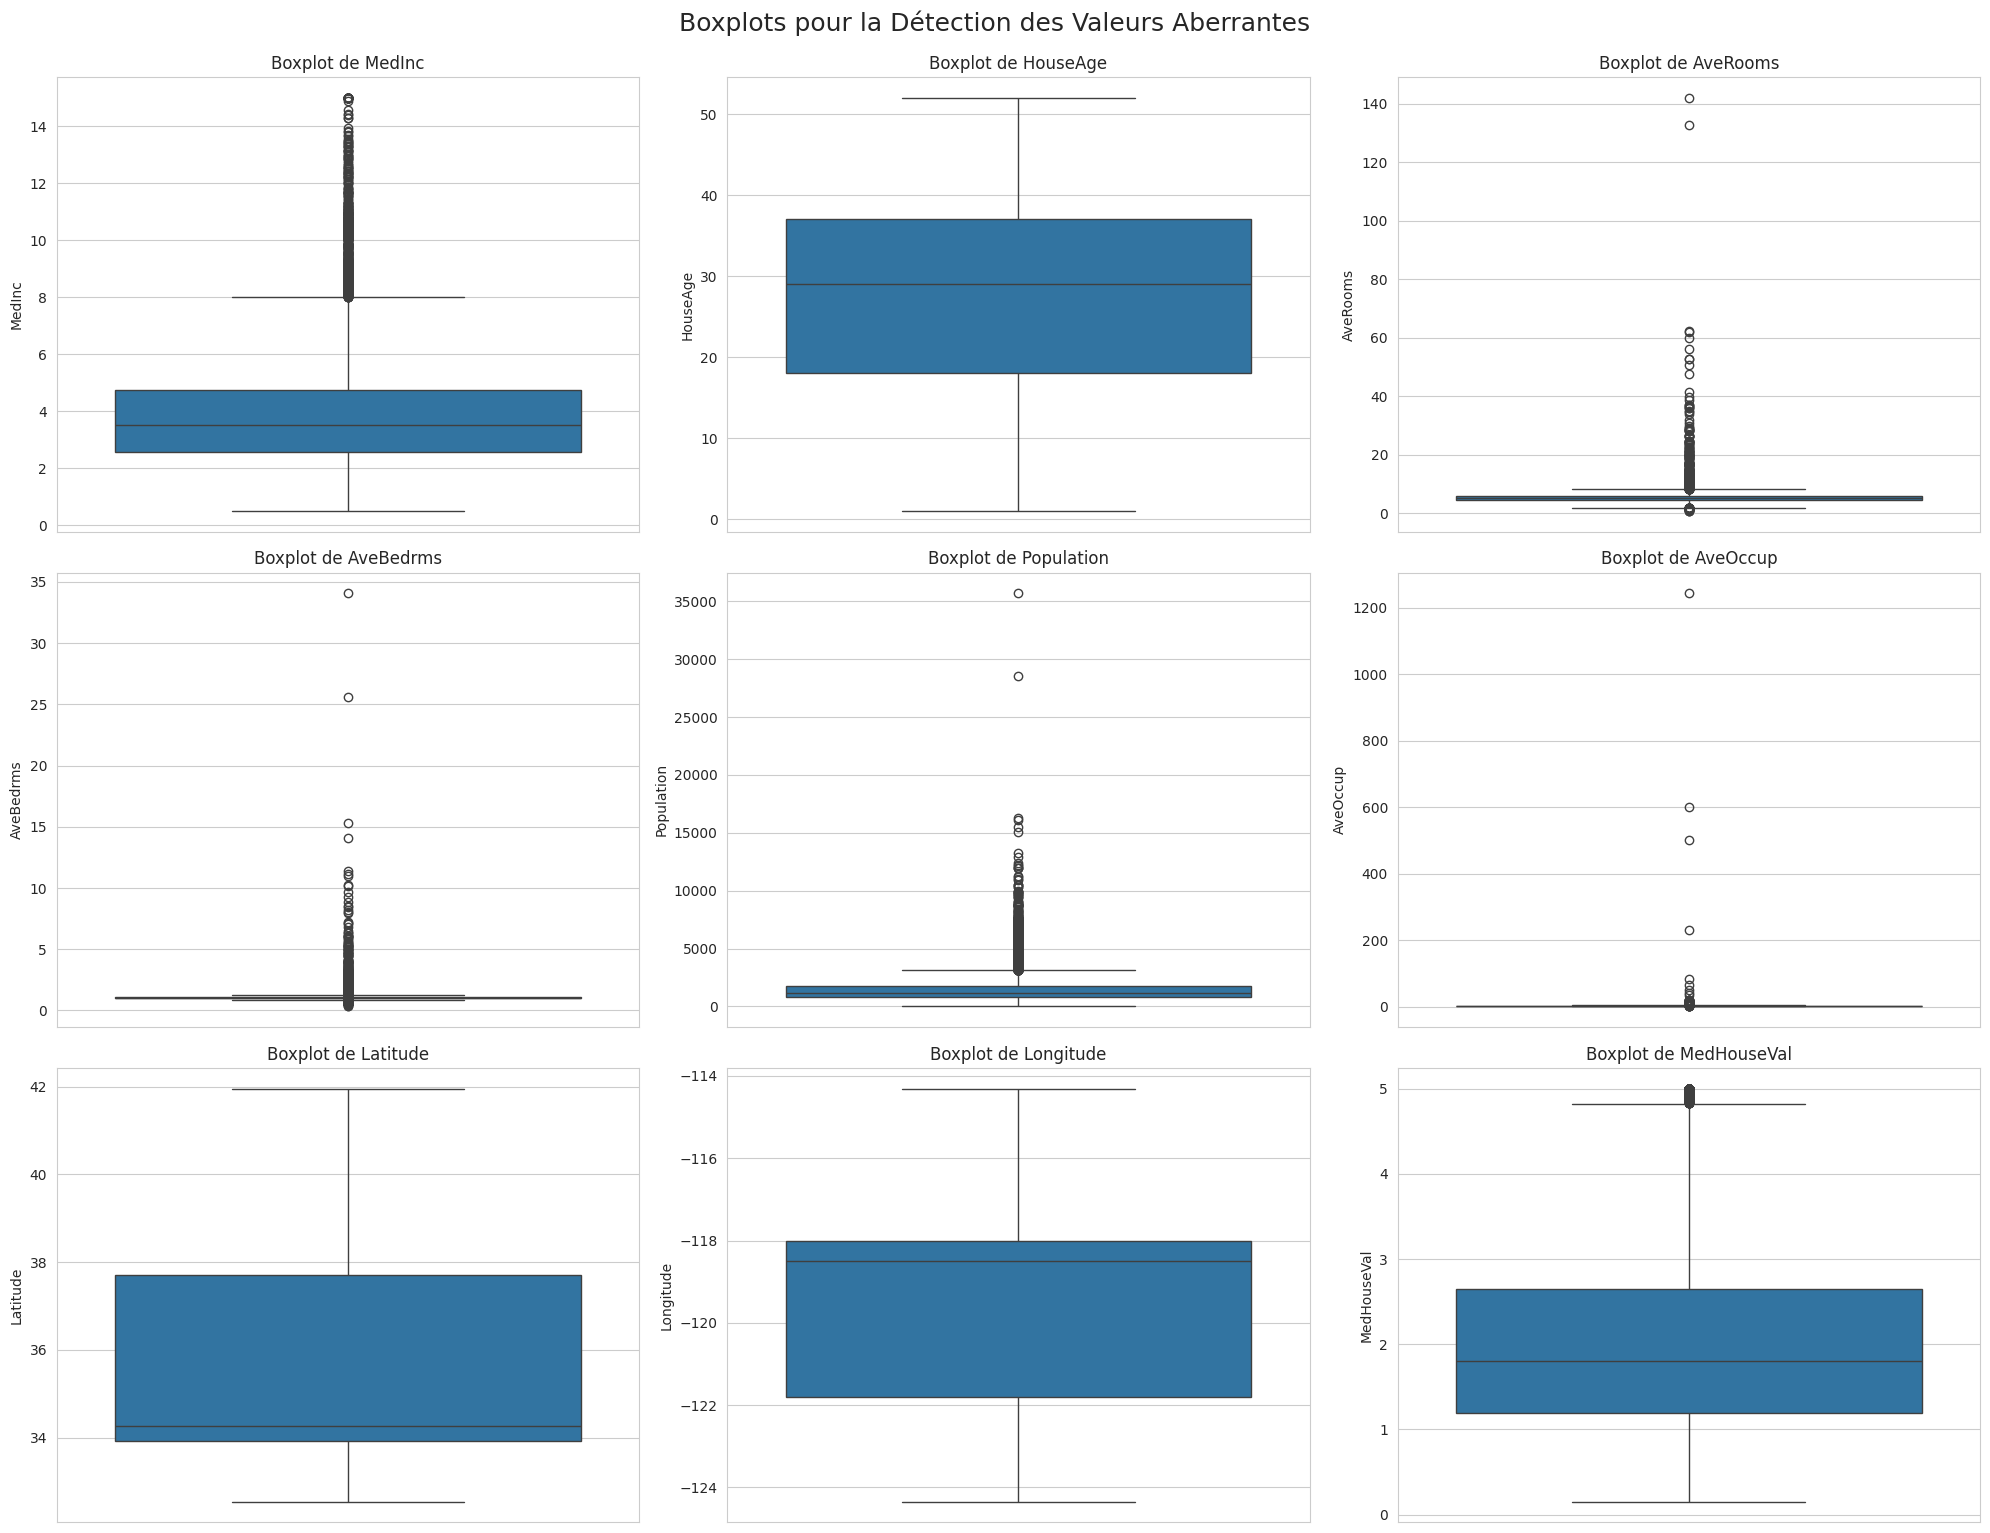

In [ ]:
# Détecter les valeurs aberrantes (outliers) à l'aide de boxplots
# Les boxplots montrent visuellement la distribution et les points extrêmes
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 15))
for i, column in enumerate(num_cols):
   # Ajuster la grille des sous-graphiques en fonction du nombre de colonnes.
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.suptitle('Boxplots pour la Détection des Valeurs Aberrantes', y=1.02, fontsize=18)
plt.show()

In [ ]:
# Filtrer les outliers extrêmes pour AveRooms, AveBedrms et AveOccup
# On fixe des seuils raisonnables (ex: AveRooms < 50, AveOccup < 20)
# pour éviter que ces valeurs extrêmes faussent le modèle
print(f"Nombre de lignes avant le filtrage des outliers: {df.shape[0]}")

# Filtrer les outliers extrêmes
df_filtered = df[
    (df['AveRooms'] < 50) &     # une maison avec plus de 50 pièces est très rare
    (df['AveBedrms'] < 10) &    # un nombre moyen de chambres par logement > 10 est excessif
    (df['AveOccup'] < 20)      # une occupation moyenne > 20 est également très élevée
]

# Mise à jour du DataFrame principal avec les données filtrées
df = df_filtered

print(f"Nombre de lignes après le filtrage des outliers: {df.shape[0]}")

Nombre de lignes avant le filtrage des outliers: 20640
Nombre de lignes après le filtrage des outliers: 20620


# **3. Analyse exploratoire (EDA)**

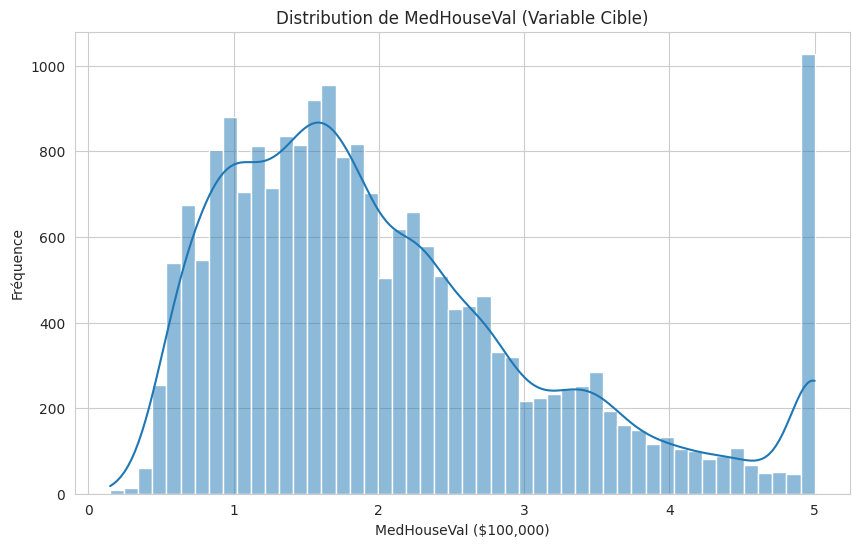

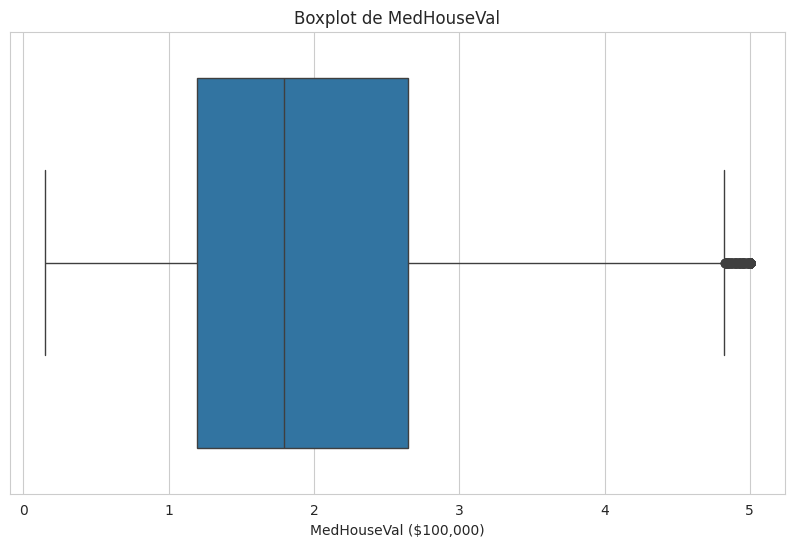

In [ ]:
# Tracer la distribution de la variable cible (MedHouseVal)
# avec un histogramme + courbe de densité (kde)
# et un boxplot pour repérer la médiane et les extrêmes

# Histogramme de la variable cible 'MedHouseVal' avec une courbe de densité (KDE)
# 'bins=50' définit le nombre de barres de l'histogramme, 'kde=True' ajoute la courbe de densité
sns.histplot(df['MedHouseVal'], kde=True, bins=50)
plt.title('Distribution de MedHouseVal (Variable Cible)') # Titre de l'histogramme
plt.xlabel('MedHouseVal ($100,000)') # Étiquette de l'axe X (valeur du logement en centaines de milliers de dollars)
plt.ylabel('Fréquence') # Étiquette de l'axe Y (fréquence d'apparition des valeurs)
plt.show() # Affiche l'histogramme

# Boxplot de la variable cible 'MedHouseVal'
# Le boxplot montre la médiane, les quartiles et les valeurs aberrantes
sns.boxplot(x=df['MedHouseVal'])
plt.title('Boxplot de MedHouseVal') # Titre du boxplot
plt.xlabel('MedHouseVal ($100,000)') # Étiquette de l'axe X
plt.show() # Affiche le boxplot

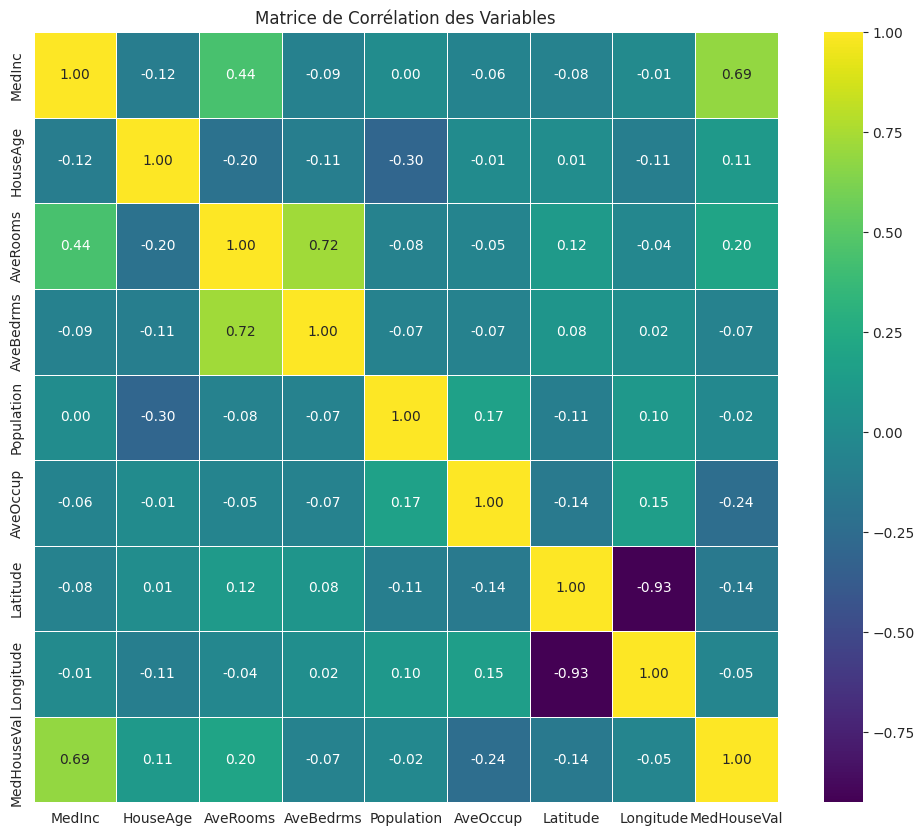

In [ ]:
# Calculer et afficher la matrice de corrélation sous forme de heatmap
# Cela permet d'identifier quelles variables sont le plus liées au prix :
#   - corrélation proche de +1 → relation positive forte
#
#   - corrélation proche de -1 → relation négative forte- corrélation proche de  0 → pas de relation linéaire
# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Afficher la heatmap de la matrice de corrélation
plt.figure(figsize=(12, 10)) # Ajuster la taille de la figure pour une meilleure lisibilité
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation des Variables') # Ajouter un titre explicite
plt.show()

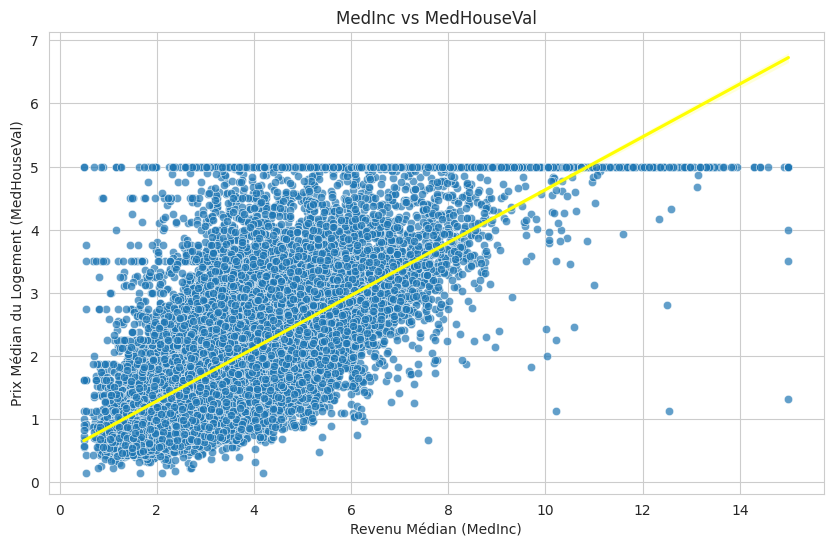

In [ ]:
# Scatter plots : croiser les variables les plus corrélées avec la cible
# Ex : MedInc vs MedHouseVal → on s'attend à une relation positive forte
# (plus le revenu est élevé, plus le logement est cher)

# Scatter plot: MedInc vs MedHouseVal
sns.scatterplot(x='MedInc', y='MedHouseVal', data=df, alpha=0.7)
sns.regplot(x='MedInc', y='MedHouseVal',  data=df, scatter=False, color='yellow')
plt.title('MedInc vs MedHouseVal')
plt.xlabel('Revenu Médian (MedInc)')
plt.ylabel('Prix Médian du Logement (MedHouseVal)')
plt.show()

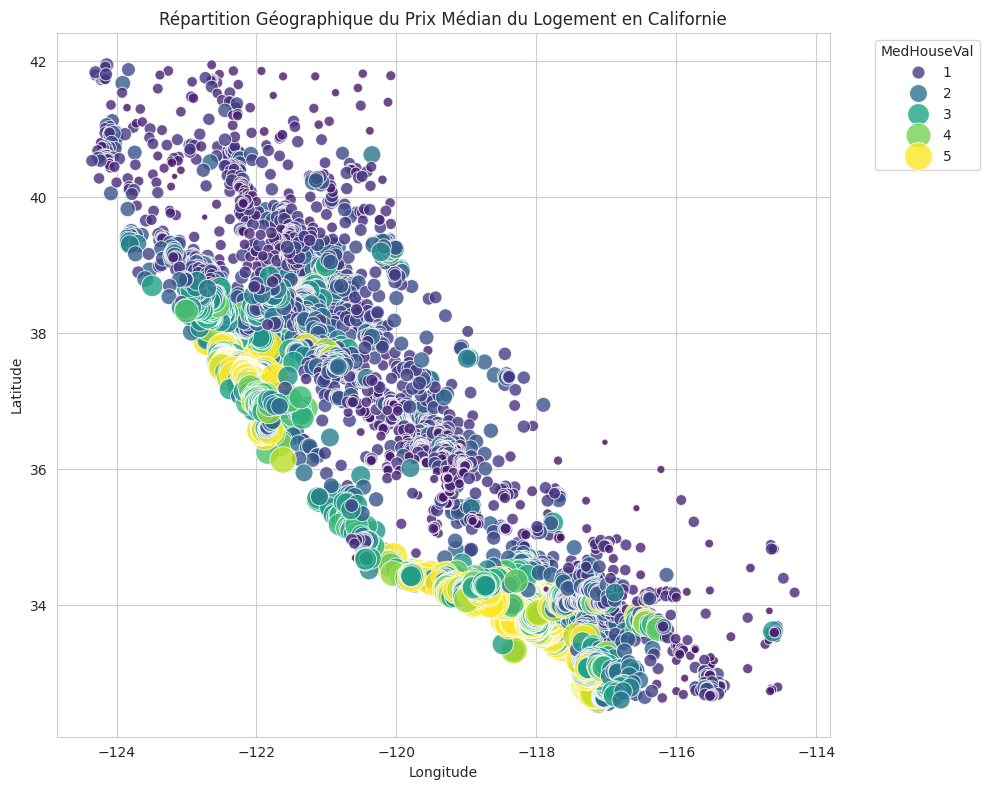

In [ ]:
# Carte géographique : afficher chaque quartier (Latitude, Longitude)
# coloré selon le prix médian, pour visualiser la répartition spatiale
# des prix en Californie (zones côtières = plus cher)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Longitude', y='Latitude', hue='MedHouseVal', size='MedHouseVal', data=df, palette='viridis', alpha=0.8, sizes=(20, 400))
plt.title('Répartition Géographique du Prix Médian du Logement en Californie')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='MedHouseVal', bbox_to_anchor=(1.05, 1), loc='upper left') # Légende
plt.tight_layout() # Ajuster la mise en page pour éviter le chevauchement
plt.show()

# **4. Ingénierie des variables**

In [ ]:
# Créer de nouvelles variables dérivées, par exemple :
#   PiecesParChambre = AveRooms / AveBedrms  (ratio pièces/chambres)
#   PopParLogement   = Population / AveOccup  (estimation du nb de logements)
# Ces nouvelles features peuvent capturer des informations supplémentaires

# Créer une copie explicite du DataFrame pour éviter SettingWithCopyWarning
df = df.copy()

df['PiecesParChambre'] = df['AveRooms'] / df['AveBedrms']
df['PopParLogement'] = df['Population'] / df['AveOccup']

print("Nouvelles variables dérivées créées avec succès.")
display(df[['AveRooms', 'AveBedrms', 'PiecesParChambre', 'Population', 'AveOccup', 'PopParLogement']].head())

Nouvelles variables dérivées créées avec succès.


,AveRooms,AveBedrms,PiecesParChambre,Population,AveOccup,PopParLogement
0,6.984127,1.023810,6.821705,322.0,2.555556,126.0
1,6.238137,0.971880,6.418626,2401.0,2.109842,1138.0
2,8.288136,1.073446,7.721053,496.0,2.802260,177.0
3,5.817352,1.073059,5.421277,558.0,2.547945,219.0
4,6.281853,1.081081,5.810714,565.0,2.181467,259.0


In [ ]:
# Séparer les données en :
#   X = variables explicatives (features) → les 10 colonnes d'entrée
#   y = variable cible → MedHouseVal (le prix à prédire)
# Définir les variables explicatives (X) et la variable cible (y)
X = df.drop('MedHouseVal', axis=1) # Toutes les colonnes sauf 'MedHouseVal'
y = df['MedHouseVal'] # La variable cible

print(f"Dimensions de X (features): {X.shape}")
print(f"Dimensions de y (cible): {y.shape}")

# Afficher les premières lignes de X et y pour vérification
print("\nPremières lignes de X:")
display(X.head())
print("\nPremières lignes de y:")
display(y.head())

Dimensions de X (features): (20620, 10)
Dimensions de y (cible): (20620,)

Premières lignes de X:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PiecesParChambre,PopParLogement
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,6.821705,126.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,6.418626,1138.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,7.721053,177.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,5.421277,219.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,5.810714,259.0



Premières lignes de y:


,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


# **5. Séparation entraînement / test**

In [ ]:
# Diviser X et y en deux sous-ensembles avec train_test_split :
#   - 80% pour l'entraînement (le modèle apprend sur ces données)
#   - 20% pour le test (on évalue la qualité des prédictions)
# Le paramètre random_state=42 garantit la reproductibilité
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dimensions de X_train : {X_train.shape}")
print(f"Dimensions de X_test : {X_test.shape}")
print(f"Dimensions de y_train : {y_train.shape}")
print(f"Dimensions de y_test : {y_test.shape}")

Dimensions de X_train : (16496, 10)
Dimensions de X_test : (4124, 10)
Dimensions de y_train : (16496,)
Dimensions de y_test : (4124,)


# **6. Construction du modèle de régression linéaire**

Le modèle cherche à trouver la relation :

$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n$

où $\hat{y}$ est la valeur prédite, $\beta_0$ est l'ordonnée à l'origine, et $\beta_i$ sont les coefficients des variables $x_i$.

In [ ]:

# Instancier LinearRegression() et entraîner avec .fit(X_train, y_train)
# Le modèle calcule les coefficients β optimaux en minimisant
# la somme des carrés des erreurs (méthode des moindres carrés)
# Afficher :
#   - model.intercept_ → l'ordonnée à l'origine (β₀)
#   - model.coef_ → les coefficients (β₁, β₂, ..., βₙ)
# Un coefficient positif = la variable augmente le prix
# Un coefficient négatif = la variable diminue le prix
# Instancier LinearRegression()
model = LinearRegression()

# Entraîner le modèle avec .fit(X_train, y_train)
# Le modèle calcule les coefficients β optimaux en minimisant
# la somme des carrés des erreurs (méthode des moindres carrés)
model.fit(X_train, y_train)

# Afficher l'ordonnée à l'origine (β₀)
print(f"Ordonnée à l'origine (β₀) : {model.intercept_:.2f}")

# Afficher les coefficients (β₁, β₂, ..., βₙ)
print("\nCoefficients (βᵢ) par variable :")
coefficients_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
display(coefficients_df)

Ordonnée à l'origine (β₀) : -33.53

Coefficients (βᵢ) par variable :


,Variable,Coefficient
0,MedInc,0.440050
1,HouseAge,0.010921
2,AveRooms,0.089642
3,AveBedrms,-0.213081
4,Population,-0.000183
5,AveOccup,-0.175447
6,Latitude,-0.418171
7,Longitude,-0.416648
8,PiecesParChambre,-0.227512
9,PopParLogement,0.000643


# **7. Prédiction et évaluation**

In [ ]:
# Prédire les prix sur l'ensemble de test avec model.predict(X_test)
# Puis calculer les métriques d'évaluation :
#   MSE  = moyenne des (réel - prédit)²     → erreur quadratique moyenne
#   RMSE = √MSE                                            → plus interprétable (même unité que y)
#   MAE  = moyenne des |réel - prédit|     → erreur absolue moyenne
#   R²   = 1 - (SS_res / SS_tot)                        → proportion de variance expliquée
# R² = 1.0                                                          → prédiction parfaite
# R² = 0.0                                                          → le modèle ne fait pas mieux que la moyenne

y_pred = model.predict(X_test)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n----- Métriques d'Évaluation du Modèle -----")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"--------------------------------------------")

# Interprétation :
# - MSE/RMSE/MAE : Plus ces valeurs sont proches de 0, meilleure est la prédiction.
# - R² : Plus cette valeur est proche de 1, plus le modèle explique la variance des données.


----- Métriques d'Évaluation du Modèle -----
Mean Squared Error (MSE): 0.46
Root Mean Squared Error (RMSE): 0.68
Mean Absolute Error (MAE): 0.49
R-squared (R²): 0.65
--------------------------------------------


# **8. Visualisation des résultats**

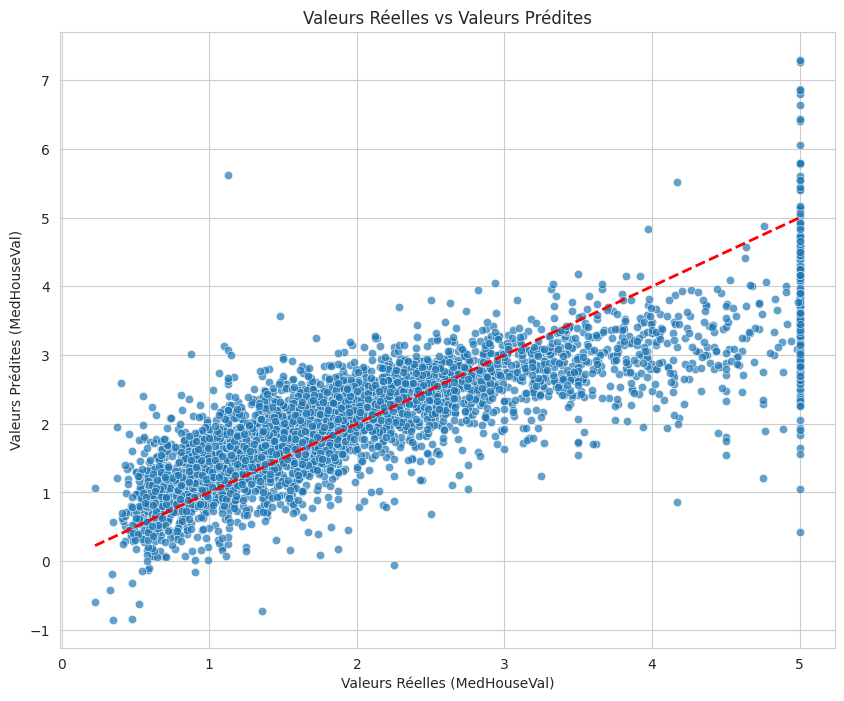

In [ ]:
# Graphique 1 : Valeurs réelles vs Prédites
# Un scatter plot avec la ligne diagonale (prédiction parfaite)
# Plus les points sont proches de la diagonale, meilleur est le modèle

plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ligne de prédiction parfaite
plt.title('Valeurs Réelles vs Valeurs Prédites')
plt.xlabel('Valeurs Réelles (MedHouseVal)')
plt.ylabel('Valeurs Prédites (MedHouseVal)')
plt.show()

Text(0.5, 0, 'Prédictions (MedHouseVal)')

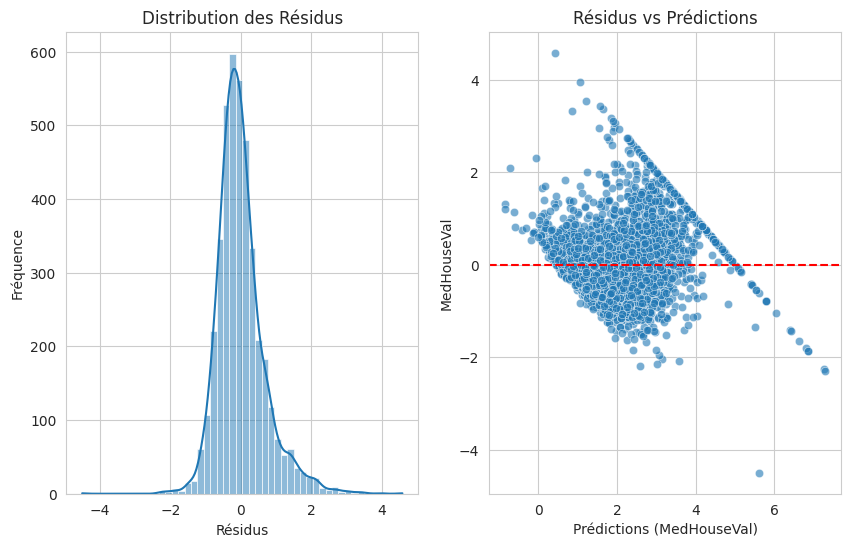

In [ ]:
# Graphique 2 : Analyse des résidus (résidu = réel - prédit)
#   a) Histogramme des résidus → devrait suivre une distribution normale centrée sur 0
#   b) Résidus vs Prédictions → les points doivent être dispersés aléatoirement
#   (un pattern visible indiquerait que le modèle rate quelque chose)
# Calculer les résidus
residuals = y_test - y_pred

# a) Histogramme des résidus
plt.subplot(1, 2, 1) # 1 ligne, 2 colonnes, 1ère figure
sns.histplot(residuals, kde=True, bins=50)
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')

# b) Scatter plot des résidus vs prédictions
plt.subplot(1, 2, 2) # 1 ligne, 2 colonnes, 2ème figure
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--') # Ligne de référence à y=0
plt.title('Résidus vs Prédictions')
plt.xlabel('Prédictions (MedHouseVal)')

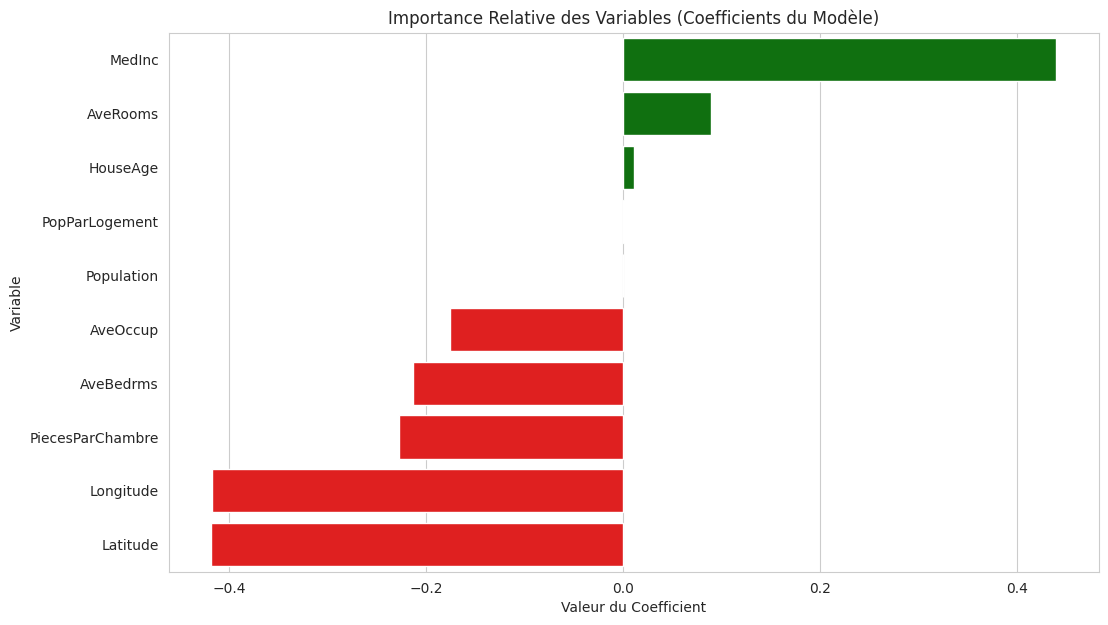

In [ ]:
# Graphique 3 : Barplot des coefficients du modèle
# Permet de visualiser l'importance relative de chaque variable :
#   Coefficient positif = contribue à augmenter le prix
#   Coefficient négatif = contribue à diminuer le prix

# Créer un DataFrame pour les coefficients
coefficients_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
})

# Trier les coefficients pour une meilleure lisibilité
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

# Créer une palette de couleurs personnalisée (vert pour positif, rouge pour négatif)
colors = ['green' if c > 0 else 'red' for c in coefficients_df['Coefficient']]

plt.figure(figsize=(12, 7))
sns.barplot(x='Coefficient', y='Variable', data=coefficients_df, palette=colors, hue='Variable', legend=False)
plt.title('Importance Relative des Variables (Coefficients du Modèle)')
plt.xlabel('Valeur du Coefficient')
plt.ylabel('Variable')
plt.show()

# **9. Export des résultats**

In [ ]:
# Créer un DataFrame de résultats contenant :
#   - les features du test
#   - le prix réel- le prix prédit
#    - le résidu (écart)
#  - l'erreur en pourcentage
# Puis exporter en CSV avec .to_csv("resultats_regression.csv")

# Calculer les résidus (réel - prédit)
residuals = y_test - y_pred

# Calculer l'erreur en pourcentage
# Assurer qu'on ne divise pas par zéro pour éviter les erreurs, bien que peu probable avec MedHouseVal
percentage_error = (np.abs(residuals) / y_test) * 100

# Créer le DataFrame de résultats
results_df = X_test.copy() # Commencer avec les features du test
results_df['Prix_Reel'] = y_test
results_df['Prix_Predits'] = y_pred
results_df['Residus'] = residuals
results_df['Erreur_Pourcentage'] = percentage_error

# Afficher les premières lignes du DataFrame de résultats
print("Aperçu du DataFrame de résultats :")
display(results_df.head())

# Exporter les résultats en CSV
results_df.to_csv("resultats_regression.csv", index=True)
print("\nLes résultats ont été exportés dans 'resultats_regression.csv'")

Aperçu du DataFrame de résultats :


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PiecesParChambre,PopParLogement,Prix_Reel,Prix_Predits,Residus,Erreur_Pourcentage
6151,3.1621,6.0,3.939516,1.076613,1584.0,3.193548,34.09,-117.96,3.659176,496.0,1.310,1.579415,-0.269415,20.566039
16208,1.3417,40.0,4.659794,1.123711,412.0,4.247423,37.94,-121.30,4.146789,97.0,0.608,0.647815,-0.039815,6.548440
15978,3.9300,52.0,4.781579,1.181579,948.0,2.494737,37.76,-122.46,4.046771,380.0,3.900,2.889162,1.010838,25.918923
18375,7.7201,21.0,7.753750,0.997500,2494.0,3.117500,37.22,-121.85,7.773183,800.0,3.627,3.526002,0.100998,2.784616
8402,2.3125,38.0,3.394366,1.076682,3036.0,4.751174,33.94,-118.36,3.152616,639.0,1.485,1.403930,0.081070,5.459246



Les résultats ont été exportés dans 'resultats_regression.csv'


# **10. Analyse et recommandations**



1.   Qualité des Données et Feature Engineering:

Le dataset de
California Housing était relativement propre, sans valeurs manquantes ni doublons.

Nous avons filtré quelques outliers extrêmes qui auraient pu biaiser le modèle.

L'ajout de variables dérivées comme PiecesParChambre et PopParLogement a enrichi notre ensemble de features, permettant au modèle de capturer des relations potentiellement plus complexes.

2.  Performance du Modèle de Régression Linéaire:

R² = 0.65: Cela signifie que notre modèle de régression linéaire explique environ 65% de la variance du prix médian du logement. C'est un point de départ raisonnable, mais il y a une marge d'amélioration, car 35% de la variance n'est pas expliquée par nos variables actuelles.

RMSE = 0.68 et MAE = 0.49: En moyenne, nos prédictions s'écartent de la valeur réelle d'environ 49 000  puisque les valeurs sont en centaines de milliers de $. Le RMSE étant un peu plus élevé, cela indique la présence de quelques erreurs plus importantes que la moyenne il pénalise davantage les grandes erreurs.



*   Visualisation Réel vs Prédit

Le graphique montre une tendance générale où les points suivent la ligne de prédiction parfaite. Cependant, on observe une dispersion, surtout pour les valeurs élevées de MedHouseVal, où le modèle semble sous-estimer les prix très élevés et surestimer parfois les prix bas. Cela est typique des modèles linéaires qui peinent à capturer des non-linéarités ou des valeurs extrêmes.



*   Analyse des Résidus

Histogramme des résidus: La distribution des résidus est relativement centrée autour de zéro et suit une forme quasi-normale, ce qui est un bon signe. Cela suggère que le modèle n'a pas de biais systématique majeur.


Résidus vs Prédictions: Le nuage de points des résidus contre les prédictions est assez dispersé aléatoirement, sans motif clair, ce qui est souhaitable. Cela indique que le modèle ne manque pas de relations évidentes qui pourraient être capturées par une transformation des variables ou un modèle plus complexe.


Coefficients positifs: MedInc (Revenu Médian) a de loin le coefficient positif le plus fort (environ 0.44), ce qui confirme son rôle prépondérant dans l'augmentation du prix du logement. AveRooms et HouseAge ont également des impacts positifs, mais bien moindres.

Coefficients négatifs: Latitude et Longitude ont les coefficients négatifs les plus importants (environ -0.41 et -0.42), ce qui suggère une forte corrélation avec la localisation géographique, notamment l'éloignement de certaines zones désirables (ex: zones côtières, centres urbains chers). Les variables PiecesParChambre, AveBedrms et AveOccup ont aussi des coefficients négatifs, mais de moindre ampleur, ce qui peut paraître contre-intuitif pour AveBedrms par exemple, mais qui est souvent dû à des corrélations complexes entre les variables.
